In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import xarray
import time
import matplotlib.patches as patches
import glob

from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES

In [3]:
with xarray.open_dataset('/jet/home/xjliu/Tanguro_exp/Tanguro201402/wrfout_d01_2014-02-01_00:00:00',
                         decode_times=False,
                         mask_and_scale='True') as ds1:
    lons1 = ds1['XLONG'][0,0,:]
    lats1 = ds1['XLAT'][0,:,0]
    xlats = ds1.variables["XLAT"]
    xlongs = ds1.variables["XLONG"] 

In [10]:
path = '/jet/home/xjliu/Tanguro_exp/post_processing/cloudfrac_crop/'
file1 = path+'cloudfrac_diurnal_ensmean_obs'
file2 = path+'cloudfrac_diurnal_ensmean_notrees'

with xarray.open_dataset(file1,decode_times=False,mask_and_scale='True') as ds1:
    print('ok')
    cldfrac_obs = ds1['CLDFRA'].mean(('south_north','west_east'))

with xarray.open_dataset(file2,decode_times=False,mask_and_scale='True') as ds2:
    print('ok')
    cldfrac_notrees = ds2['CLDFRA'].mean(('south_north','west_east'))


ok
ok


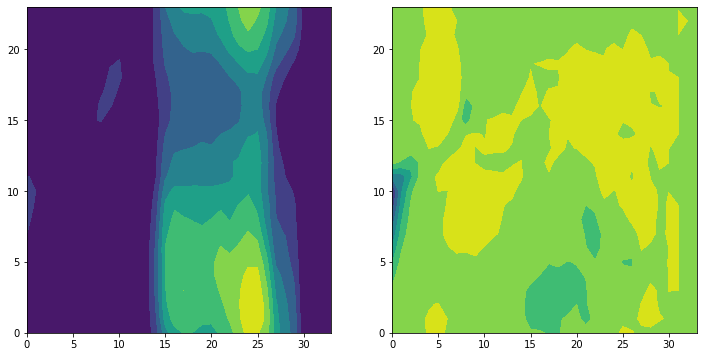

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,6))
axes = axes.ravel()
axes[0].contourf(cldfrac_obs)
axes[1].contourf(cldfrac_notrees-cldfrac_obs)

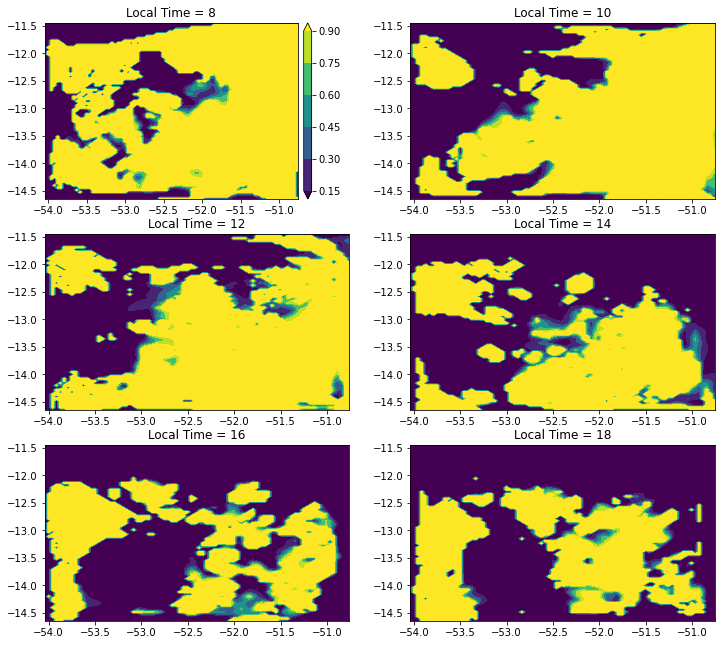

In [27]:
path='/jet/home/xjliu/Tanguro_exp/post_processing/'
file1 = path+'cloud_fraction/Cldfrac_obs_ensmean_200members.nc'
file2 = path+'cloud_fraction_notrees/Cldfrac_notrees_ensmean.nc'

with xarray.open_dataset('/jet/home/xjliu/Tanguro_exp/Tanguro201402/wrfout_d01_2014-02-01_00:00:00',
                         decode_times=False,
                         mask_and_scale='True') as ds1:
    lons1 = ds1['XLONG'][0,0,:]
    lats1 = ds1['XLAT'][0,:,0]
    xlat = ds1.variables["XLAT"]
    xlong = ds1.variables["XLONG"] 
    
    

with xarray.open_dataset(file1,decode_times=False,mask_and_scale='True') as ds1:
    cldfrac1 = ds1['CLDFRA']
with xarray.open_dataset(file2,decode_times=False,mask_and_scale='True') as ds2:
    cldfrac2 = ds2['CLDFRA']



fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(12,11))
axes = axes.ravel()
tt = [11, 13, 15, 17, 19, 21]
lev = 17
for ii in range(6):
    im1 = axes[ii].contourf(lons1,lats1,cldfrac1[0,tt[ii],lev,:,:],#cmap='YlOrRd',
                              #levels=np.linspace(0.0,1,11),
                     extend='both')
    axes[ii].set_title(('Local Time = '+str(tt[ii]-3)))

cb1 = fig.colorbar(im1,ax=axes[0],pad=0.02)
    

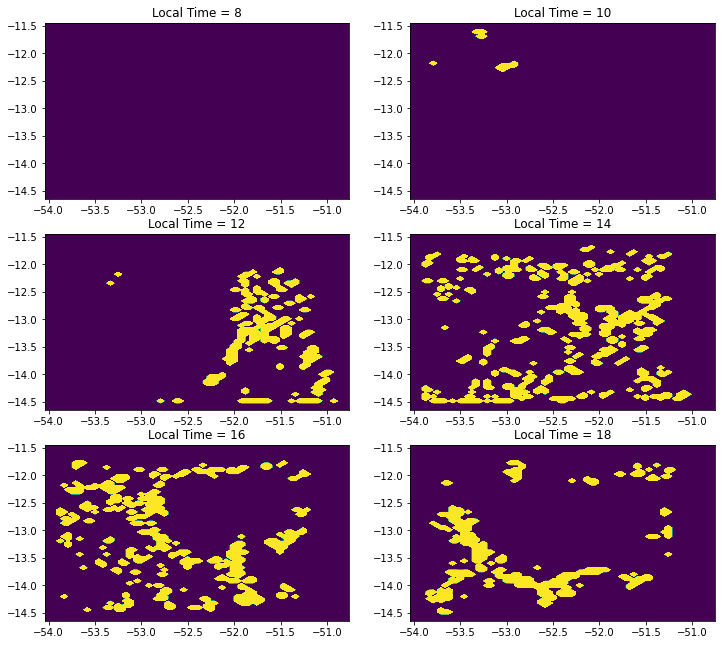

In [12]:
path='/jet/home/xjliu/Tanguro_exp/post_processing/'
file1 = path+'cloud_fraction/Cldfrac_obs_ensmean.nc'
file2 = path+'cloud_fraction_notrees/Cldfrac_notrees_ensmean.nc'

with xarray.open_dataset('/jet/home/xjliu/Tanguro_exp/Tanguro201402/wrfout_d01_2014-02-01_00:00:00',
                         decode_times=False,
                         mask_and_scale='True') as ds1:
    lons1 = ds1['XLONG'][0,0,:]
    lats1 = ds1['XLAT'][0,:,0]

with xarray.open_dataset(file1,decode_times=False,mask_and_scale='True') as ds1:
    cldfrac1 = ds1['CLDFRA']
with xarray.open_dataset(file2,decode_times=False,mask_and_scale='True') as ds2:
    cldfrac2 = ds2['CLDFRA']

#wrflist = Dataset(file1)
#cldfrac1_cat = getvar(wrflist, "cloudfrac")
#dif_frac = cldfrac2 - cldfrac1

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(12,11))
axes = axes.ravel()
tt = [11, 13, 15, 17, 19, 21]
lev = 10
for ii in range(6):
    im1 = axes[ii].contourf(lons1,lats1,cldfrac1[0,tt[ii],lev,:,:],#cmap='YlOrRd',
                              levels=np.linspace(0.0,0.1,11),
                     extend='both')
    axes[ii].set_title(('Local Time = '+str(tt[ii]-3)))
    

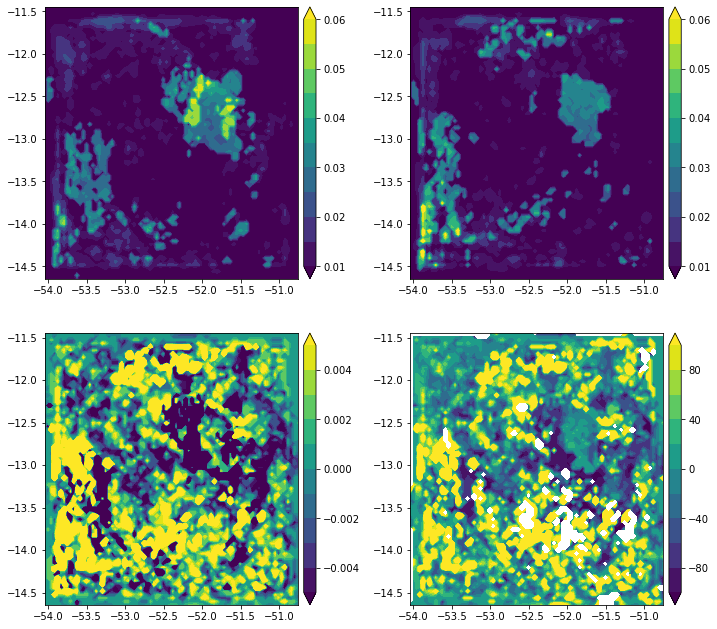

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,11))
axes = axes.ravel()
tt = 11
lev = 10
for ii in range(3):
    im1 = axes[0].contourf(lons1,lats1,cldfrac1[0,tt,lev,:,:],#cmap='YlOrRd',
                              levels=np.linspace(0.01,0.06,11),
                     extend='both')
    im2 = axes[1].contourf(lons1,lats1,cldfrac2[0,tt,lev,:,:],#cmap='YlOrRd',
                                levels=np.linspace(0.01,0.06,11),
                     extend='both')
    im3 = axes[2].contourf(lons1,lats1,dif_frac[0,tt,lev,:,:],#cmap='YlOrRd',
                                levels=np.linspace(-0.005,0.005,11),
                     extend='both')
    im4 = axes[3].contourf(lons1,lats1,dif_frac[0,tt,lev,:,:]/cldfrac1[0,tt,lev,:,:]*100,#cmap='YlOrRd',
                                levels=np.linspace(-1,1,11)*100,
                     extend='both')

    #axes[0].set_ylabel('latitude',fontsize=12,labelpad=-10)
    
cb1 = fig.colorbar(im1,ax=axes[0],pad=0.02)
cb2 = fig.colorbar(im2,ax=axes[1],pad=0.02)
cb3 = fig.colorbar(im3,ax=axes[2],pad=0.02)
cb4 = fig.colorbar(im4,ax=axes[3],pad=0.02)

    #fig.colorbar(im2,ax=axes[1],pad=0.02)        

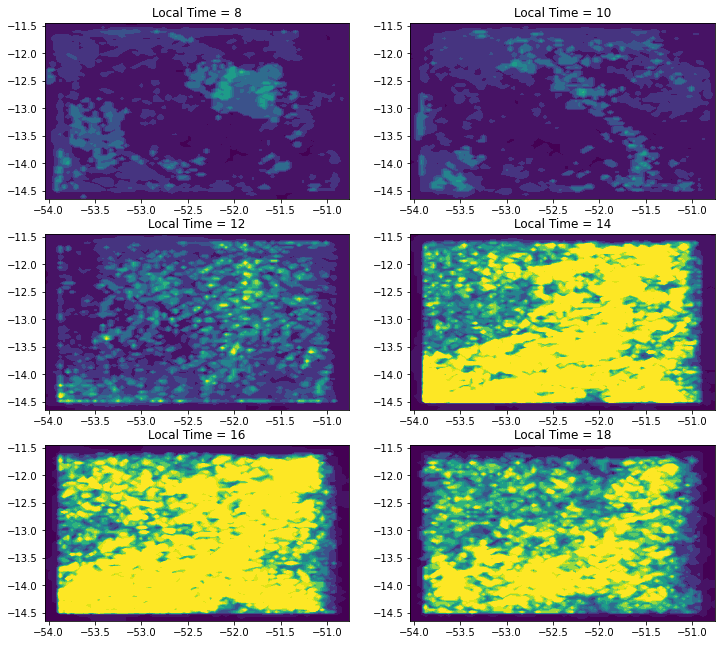

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(12,11))
axes = axes.ravel()
tt = [11, 13, 15, 17, 19, 21]
lev = 10
for ii in range(6):
    im1 = axes[ii].contourf(lons1,lats1,cldfrac1[0,tt[ii],lev,:,:],#cmap='YlOrRd',
                              levels=np.linspace(0.0,0.1,11),
                     extend='both')
    axes[ii].set_title(('Local Time = '+str(tt[ii]-3)))
    

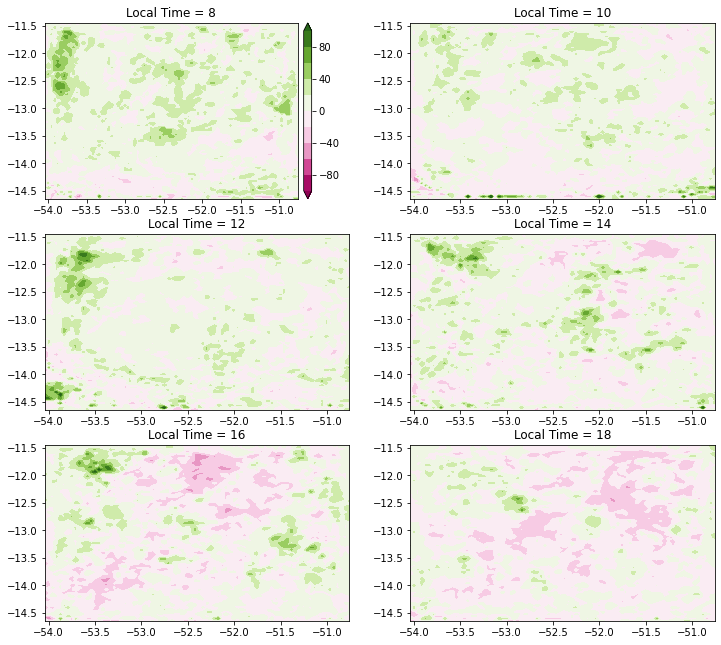

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(12,11))
axes = axes.ravel()
tt = [11, 13, 15, 17, 19, 21]
lev = 25
for ii in range(6):
    im1 = axes[ii].contourf(lons1,lats1,dif_frac[0,tt[ii],lev,:,:]/cldfrac1[0,tt[ii],lev,:,:]*100,cmap='PiYG',
                              levels=np.linspace(-1,1,11)*100,
                     extend='both')
    axes[ii].set_title(('Local Time = '+str(tt[ii]-3)))

cb1 = fig.colorbar(im1,ax=axes[0],pad=0.02)

Text(0.5, 1.0, 'Land Use')

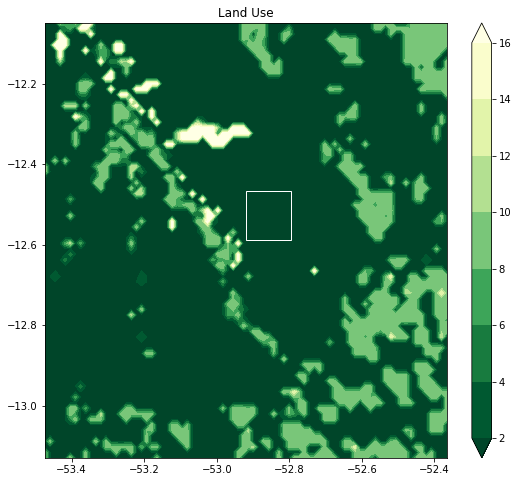

In [20]:
fig,ax=plt.subplots(nrows=1, ncols=1,figsize=(9,8))
plt.contourf(lons1,lats1,ds1.LU_INDEX[0,:,:],cmap='YlGn_r',
                     extend='both')
plt.colorbar()
domain2 = patches.Rectangle((lons2[0], lats2[0]), lons2[-1]-lons2[0], lats2[-1]-lats2[0], 
                         linewidth=1, edgecolor='w', facecolor='none')
ax.add_patch(domain2)
#plt.xlim([-80,-40])
#plt.ylim([-20,0])
ax.set_title('Land Use')

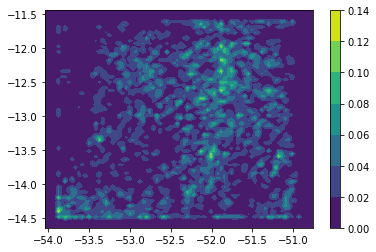

In [6]:
plt.contourf(lons1,lats1,cldfrac1[0,15,10,:,:])
plt.colorbar()

### Load Domain 1 data

In [3]:
# Creating a simple test list with three timesteps
wrflist1 = Dataset(files1)
for filename in files1[9::2]:
    wrflist1.append(Dataset(filename))

#cldfrac1_cat

### Load Domain 2 Data

In [4]:
# Creating a simple test list with three timesteps
wrflist1 = [Dataset(files2[1])]
cldfrac2_cat = getvar(Dataset(files2[1]), "cloudfrac",timeidx=0)

for filename in files2[3::2]:
    cldfrac2 = getvar(Dataset(filename), "cloudfrac",timeidx=0)
    cldfrac2_cat = xarray.concat([cldfrac2_cat,cldfrac2],dim='Hour')   

#cldfrac2_cat

Text(0.5, 1.0, 'Land Use')

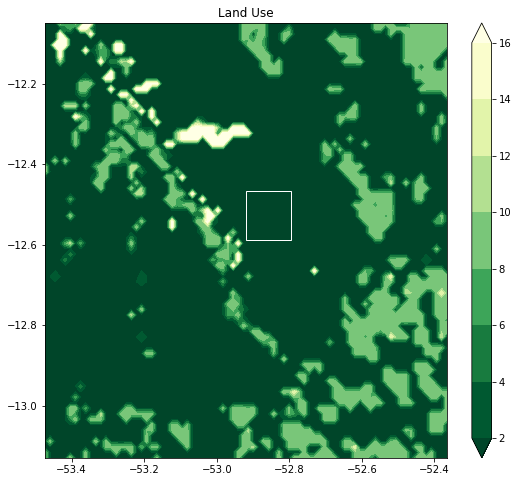

In [20]:
fig,ax=plt.subplots(nrows=1, ncols=1,figsize=(9,8))
plt.contourf(lons1,lats1,ds1.LU_INDEX[0,:,:],cmap='YlGn_r',
                     extend='both')
plt.colorbar()
domain2 = patches.Rectangle((lons2[0], lats2[0]), lons2[-1]-lons2[0], lats2[-1]-lats2[0], 
                         linewidth=1, edgecolor='w', facecolor='none')
ax.add_patch(domain2)
#plt.xlim([-80,-40])
#plt.ylim([-20,0])
ax.set_title('Land Use')

### Cloud fraction at UTC 15. 

In [25]:
files1[12]

'/jet/home/xjliu/Amazon_exp/nest_150m/wrfout_d01_2014-01-01_15:00:00'

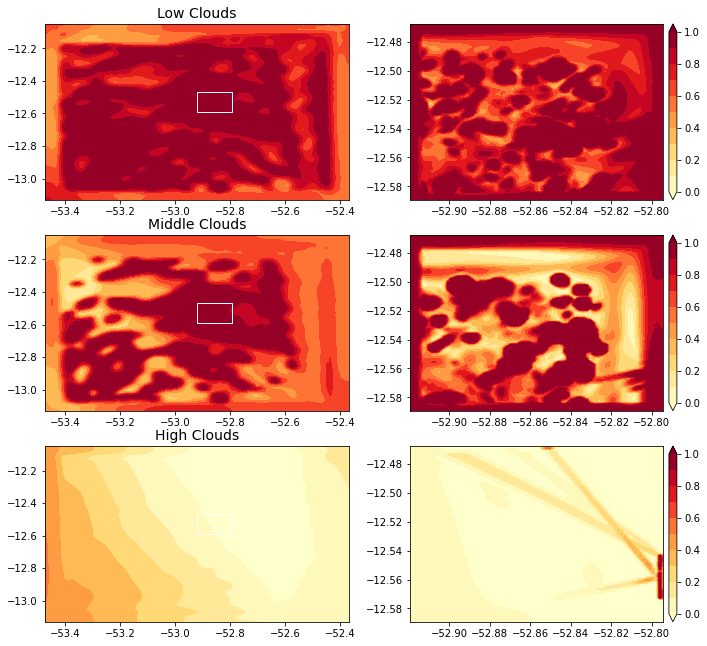

In [5]:
ncfile = Dataset(files2[6])
cldfrac2 = getvar(ncfile, "cloudfrac")

ncfile = Dataset(files1[12])
cldfrac1 = getvar(ncfile, "cloudfrac")

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(12,11))
#axes = axes.ravel()
for ii in range(3):
    im1 = axes[ii,0].contourf(lons1,lats1,cldfrac1[ii,:,:],cmap='YlOrRd',
                              levels=np.linspace(0.0,1.0,11),
                     extend='both')
    im2 = axes[ii,1].contourf(lons2,lats2,cldfrac2[ii,:,:],cmap='YlOrRd',
                                levels=np.linspace(0.0,1.0,11),
                     extend='both')

    #axes[0].set_ylabel('latitude',fontsize=12,labelpad=-10)
    
    #cb1 = fig.colorbar(im1,ax=axes[0],pad=0.02)
    fig.colorbar(im2,ax=axes[ii,1],pad=0.02)        
## Label which domain the panel is
#axes[0].set_xlim([-53,-52.6])
#axes[0].set_ylim([-12.7,-12.4])
    domain2 = patches.Rectangle((lons2[0], lats2[0]), lons2[-1]-lons2[0], lats2[-1]-lats2[0], 
                         linewidth=1, edgecolor='w', facecolor='none')
    axes[ii,0].add_patch(domain2)

axes[0,0].set_title('Low Clouds',fontsize=14)
axes[1,0].set_title('Middle Clouds',fontsize=14)
axes[2,0].set_title('High Clouds',fontsize=14)
fig.savefig('clouds_at_noon.png',format='png',dpi=400,bbox_inches='tight')


### Create an animation

RuntimeError: Requested MovieWriter (ffmpeg) not available

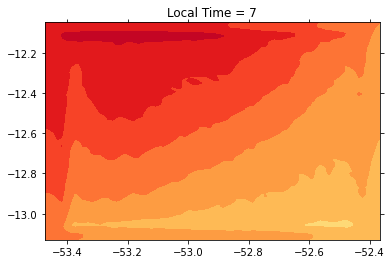

In [42]:
fig,ax = plt.subplots()

Hours = pd.to_datetime(cldfrac1_cat.Time).hour

def animate(ii):
    ax.clear()
    ax.contourf(lons1,lats1,cldfrac1_cat[0,ii,:,:],cmap='YlOrRd',
                              levels=np.linspace(0.0,1.0,11),
                     extend='both')
    ax.set_title(('Local Time = '+str(Hours[ii]-3)))

interval = 20 #in seconds     
anim = animation.FuncAnimation(fig,animate,7,interval=interval*1e+3,blit=False)

#plt.show()

from IPython.display import HTML
HTML(anim.to_html5_video())

#anim.save('us.gif', writer='imagemagick', fps=5)

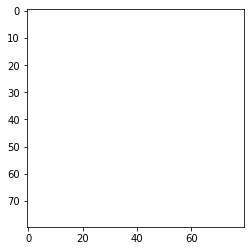

In [12]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(7):
    #im = ax.contourf(lons1,lats1,cldfrac1_cat[0,ii,:,:],cmap='YlOrRd',
    #                          levels=np.linspace(0.0,1.0,11),
    #                 extend='both',
    #                animated=True)
    im = ax.imshow(cldfrac1_cat[0,ii,:,:], animated=True)
    if i == 0:
        ax.contourf(lons1,lats1,cldfrac1_cat[0,0,:,:],cmap='YlOrRd',
                              levels=np.linspace(0.0,1.0,11),
                     extend='both')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

### Cloud fraction from UTC 10 to UTC 23, every 2 hours (LT: 7, 9, 11, 13, 15, 17, 19)
### 1st, Low Cloud

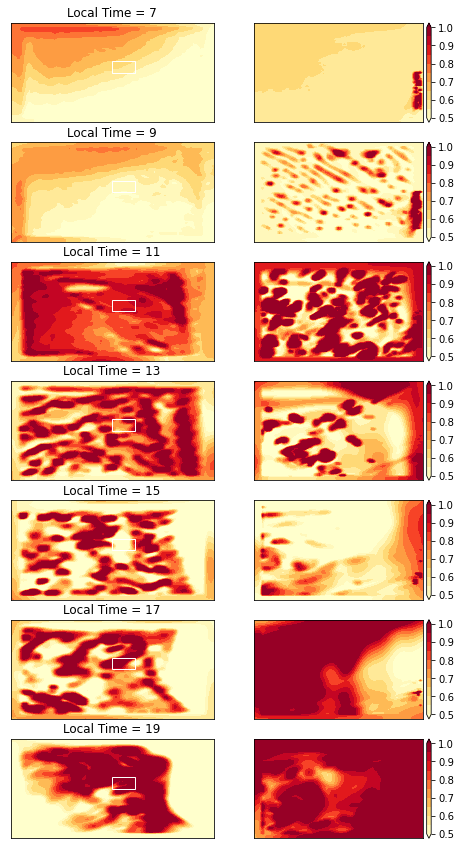

In [27]:
fig, axes = plt.subplots(nrows=7, ncols=2,figsize=(8,15))
#axes = axes.ravel()
for ii in range(7):
    im1 = axes[ii,0].contourf(lons1,lats1,cldfrac1_cat[0,ii,:,:],cmap='YlOrRd',
                              levels=np.linspace(0.5,1.0,11),
                     extend='both')
    im2 = axes[ii,1].contourf(lons2,lats2,cldfrac2_cat[ii,0,:,:],cmap='YlOrRd',
                                levels=np.linspace(0.5,1.0,11),
                     extend='both')

    #axes[0].set_ylabel('latitude',fontsize=12,labelpad=-10)
    
    #cb1 = fig.colorbar(im1,ax=axes[0],pad=0.02)
    fig.colorbar(im2,ax=axes[ii,1],pad=0.02)        
## Label which domain the panel is
#axes[0].set_xlim([-53,-52.6])
#axes[0].set_ylim([-12.7,-12.4])
    domain2 = patches.Rectangle((lons2[0], lats2[0]), lons2[-1]-lons2[0], lats2[-1]-lats2[0], 
                         linewidth=1, edgecolor='w', facecolor='none')
    axes[ii,0].add_patch(domain2)

    
Hours = pd.to_datetime(cldfrac1_cat.Time).hour
for ii in range(7):
    axes[ii,0].set_title(('Local Time = '+str(Hours[ii]-3)))
    
axes = axes.ravel()
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.savefig('Low_cloud.png',format='png',dpi=400,bbox_inches='tight')


### High Cloud

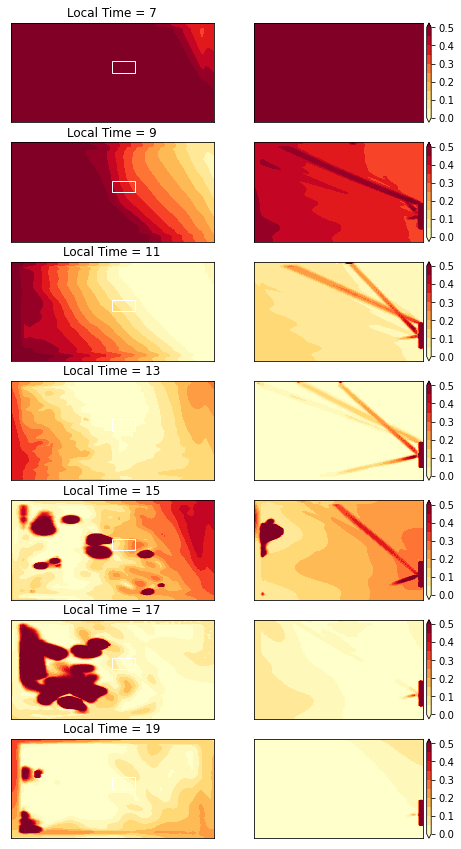

In [28]:
fig, axes = plt.subplots(nrows=7, ncols=2,figsize=(8,15))
#axes = axes.ravel()
for ii in range(7):
    im1 = axes[ii,0].contourf(lons1,lats1,cldfrac1_cat[2,ii,:,:],cmap='YlOrRd',
                              levels=np.linspace(0.0,0.5,11),
                     extend='both')
    im2 = axes[ii,1].contourf(lons2,lats2,cldfrac2_cat[ii,2,:,:],cmap='YlOrRd',
                                levels=np.linspace(0.0,0.5,11),
                     extend='both')

    #axes[0].set_ylabel('latitude',fontsize=12,labelpad=-10)
    
    #cb1 = fig.colorbar(im1,ax=axes[0],pad=0.02)
    fig.colorbar(im2,ax=axes[ii,1],pad=0.02)        
## Label which domain the panel is
#axes[0].set_xlim([-53,-52.6])
#axes[0].set_ylim([-12.7,-12.4])
    domain2 = patches.Rectangle((lons2[0], lats2[0]), lons2[-1]-lons2[0], lats2[-1]-lats2[0], 
                         linewidth=1, edgecolor='w', facecolor='none')
    axes[ii,0].add_patch(domain2)

    
Hours = pd.to_datetime(cldfrac1_cat.Time).hour
for ii in range(7):
    axes[ii,0].set_title(('Local Time = '+str(Hours[ii]-3)))
    
axes = axes.ravel()
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.savefig('High_cloud.png',format='png',dpi=400,bbox_inches='tight')

### Middle Cloud

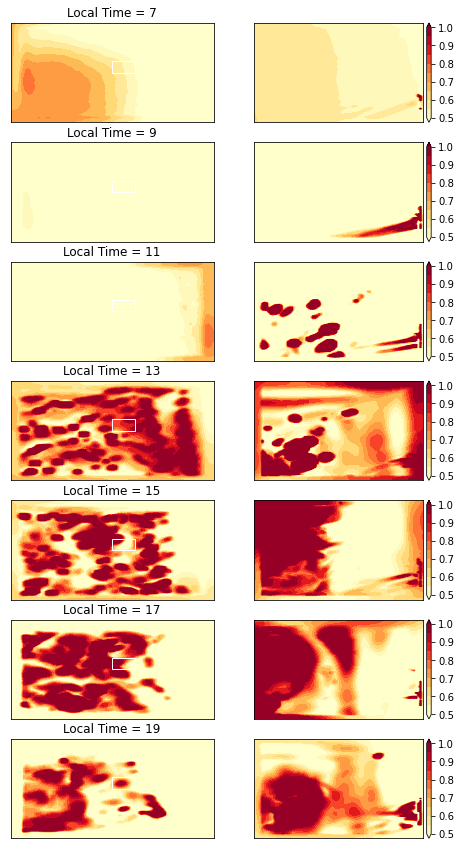

In [29]:
fig, axes = plt.subplots(nrows=7, ncols=2,figsize=(8,15))
#axes = axes.ravel()
for ii in range(7):
    im1 = axes[ii,0].contourf(lons1,lats1,cldfrac1_cat[1,ii,:,:],cmap='YlOrRd',
                              levels=np.linspace(0.5,1.0,11),
                     extend='both')
    im2 = axes[ii,1].contourf(lons2,lats2,cldfrac2_cat[ii,1,:,:],cmap='YlOrRd',
                                levels=np.linspace(0.5,1.0,11),
                     extend='both')

    #axes[0].set_ylabel('latitude',fontsize=12,labelpad=-10)
    
    #cb1 = fig.colorbar(im1,ax=axes[0],pad=0.02)
    fig.colorbar(im2,ax=axes[ii,1],pad=0.02)        
## Label which domain the panel is
#axes[0].set_xlim([-53,-52.6])
#axes[0].set_ylim([-12.7,-12.4])
    domain2 = patches.Rectangle((lons2[0], lats2[0]), lons2[-1]-lons2[0], lats2[-1]-lats2[0], 
                         linewidth=1, edgecolor='w', facecolor='none')
    axes[ii,0].add_patch(domain2)

    
Hours = pd.to_datetime(cldfrac1_cat.Time).hour
for ii in range(7):
    axes[ii,0].set_title(('Local Time = '+str(Hours[ii]-3)))
    
axes = axes.ravel()
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.savefig('Middle_cloud.png',format='png',dpi=400,bbox_inches='tight')
